# 1 Dec 2022 - Model of Two Bodies in Thermal Contact

We've developed an equation for the number of ways we can arrange a small amount of quanta on a small number of oscillators. The formula we developed for arranging $q$ on $N$ oscillators is given below:

$$\Omega = \dfrac{(q+N-1)!}{q!(N-1)!}$$

These calculations are only tractable with pencil and paper when the number of quanta and oscillators is low. For even a few hundred oscillators and quanta the calculations can only be done on a computer. In fact, we will see with this model how we can easily blow out our computational tools as well.

## Microstates and Macrostates

Remember that a particular arrangement of quanta on oscillators is a microstate. That is, atom 1 has 3 oscillators with 1 quanta each on oscillator 1 and oscillator 2. But another microstate with quanta each on oscillator 2 and 3 would be the same energy macrostate for atom 1. We typically use energy for our marker for macrostates, but this doesn't have to be the case because micro and macrostate ideas apply well beyond thermal physics to information theory, data science, networks, and general probability theory.

## The setup

Consider two blocks of material made of simple atomic oscillators that can take on quanta of energy. One block has 200 such atoms, and the other block has 300 such atoms. There are 400 quanta of energy that can be distributed between the two. 

Before we computed the number of ways for a pair of systems, showing that multiplying the ways was how to find the total number. Here we consider the number of total atoms as given, so the number of ways is a function of the number of energy quanta distributed on atom 1 ($q_1$) and the total available ($q_{tot}$).

$$\Omega_T(q_{tot},q_1) = \Omega_1(q_1)*\Omega_2(q_{tot}-q_1)$$

Your goal is to compute the number of total ways to distribute $q_1$ quanta given $q_{tot}$ available and plotting the distribution $\Omega_T$ as a function of $q_1$.

Some steps:

* Write a function that computes the number of ways given a $q$ and $N$
* Test that function on small $q$ and $N$ that we've used
* Write a function that calls the above one but sweeps through the number of quanta $q$
* Show you can reproduce the small distribution that we did by hand
* Plot the distribution of number of ways for the 200/300 oscillator setup with 400 quanta
* Try to break your code by increasing these numbers.

In [1]:
## your code here
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def countWays(q,N):
    
    ## numpy.float128 makes sure the data structure can 
    ## take on the largest possible values before overflow
    
    numerator = np.float128(np.math.factorial(q+N-1))
    denominator = np.float128(np.math.factorial(q))/np.float128(np.math.factorial(N-1))
    
    return numerator/denominator

In [3]:
def count2Atoms(qtot,q1,Ntot,N1):
    
    q2 = qtot - q1
    N2 = Ntot - N1
    
    omega1 = np.float128(countWays(q1,N1))
    omega2 = np.float128(countWays(q2,N2))
    
    return omega1, omega2, np.float128(omega1*omega2)

In [4]:
qtot = 40
q1 = 20
Ntot = 50
N1 = 20

count2Atoms(qtot,q1,Ntot,N1)

(1.0198941040598721679e+45,
 2.210645331716475554e+75,
 2.2546241399851137457e+120)

In [5]:
def sweep(qtot,Ntot,N1):
    
    N2 = Ntot - N1
    
    omega1ways = np.zeros([qtot+1,1],float)
    omega2ways = np.zeros([qtot+1,1],float)
    totalways = np.zeros([qtot+1,1],float)
    
    for i in range(qtot+1):
        
        omega1, omega2, omegatot = count2Atoms(qtot,i,Ntot,N1)
        omega1ways[i] = omega1
        omega2ways[i] = omega2
        totalways[i] = omegatot
        
    return omega1ways, omega2ways, totalways

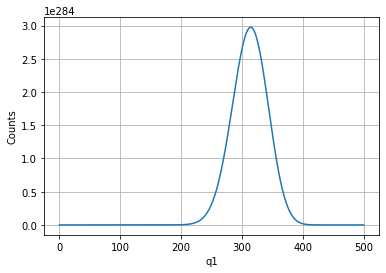

In [6]:
qtot = 500
Ntot = 80
N1 = 50

omega1, omega2, omegatot = sweep(qtot, Ntot, N1)

q1vals = np.arange(0,qtot+1,1)

plt.plot(q1vals,omegatot);
plt.ylabel('Counts')
plt.xlabel('q1')
plt.grid()

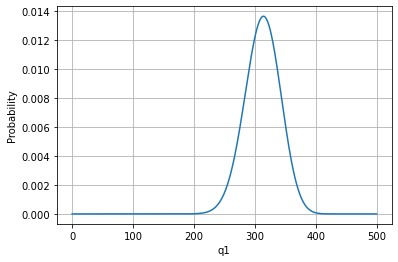

In [7]:
plt.plot(q1vals,omegatot/sum(omegatot)); #Rescaled to see the probability
plt.ylabel('Probability')
plt.xlabel('q1')
plt.grid()

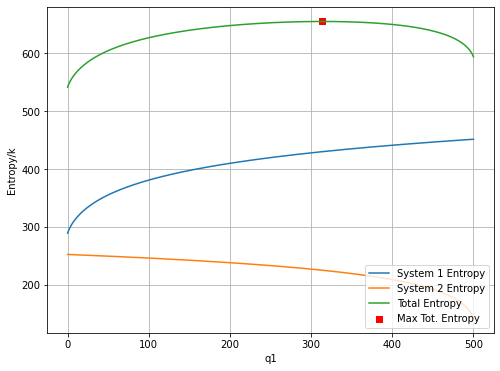

In [8]:
S1 = np.log(omega1)
S2 = np.log(omega2)
Stot = np.log(omegatot)

Smax = np.max(Stot)
qmax = np.argmax(Stot)

plt.figure(figsize=(8,6))

plt.plot(q1vals, S1, label='System 1 Entropy');
plt.plot(q1vals, S2, label='System 2 Entropy');
plt.plot(q1vals, Stot, label='Total Entropy');

plt.scatter(qmax, Smax, c='r', marker='s', label='Max Tot. Entropy')

plt.ylabel('Entropy/k')
plt.xlabel('q1')

plt.grid()
plt.legend(loc=4)